In [4]:
from numpy import *
from matplotlib.pyplot import *

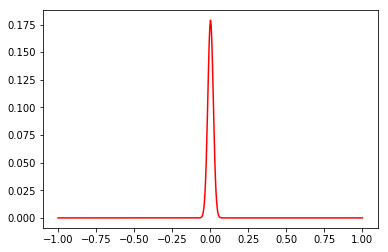

In [6]:
r = 1
n = 500

x = linspace(-r, r, n)
u = zeros(n)
u[int(n/2)] = 2
D = 1
dx = 2*r/(n-1)
dt = dx*dx/D*0.1

for i in range(100):
    dxxdu = (roll(u, -1) + roll(u, 1) - 2*u)/dx/dx
    u += dxxdu*D*dt
    
plot(x, u, "r")

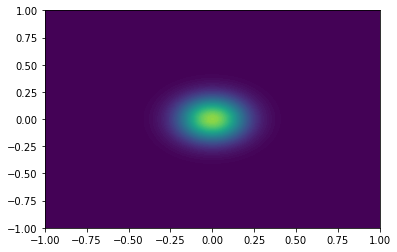

In [10]:
r = 1
n = 500

x = linspace(-r, r, n)
y = linspace(-r, r, n)
X,Y = meshgrid(x, y)
u = exp(-32*(X*X + Y*Y))
D = 1
dx = 2*r/(n-1)
dt = dx*dx/D*0.1

for i in range(1000):
    duxx = (roll(u, 1, 0) + roll(u, -1, 0) -2*u)/dx/dx
    duyy = (roll(u, 1, 1) + roll(u, -1, 1) -2*u)/dx/dx
    u += (duxx+duyy)*D*dt
contourf(X, Y, u, levels=linspace(0,1,100))    

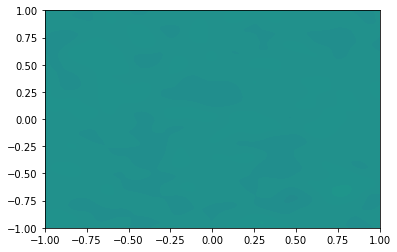

In [11]:
r = 1
n = 500

x = linspace(-r, r, n)
y = linspace(-r, r, n)
X,Y = meshgrid(x, y)
u = random.rand(n, n)
D = 1
dx = 2*r/(n-1)
dt = dx*dx/D*0.1

for i in range(1000):
    duxx = (roll(u, 1, 0) + roll(u, -1, 0) -2*u)/dx/dx
    duyy = (roll(u, 1, 1) + roll(u, -1, 1) -2*u)/dx/dx
    u += (duxx+duyy)*D*dt
contourf(X, Y, u, levels=linspace(0,1,100))    

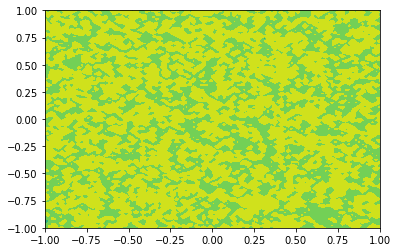

In [26]:
r = 1
n = 100
alpha = 1.5
K = 0.1
rho = 18.5
a = 92
b = 64
gamma = 9

def h(u, v):
    return rho*u*v/(1+u+K*u*u)
def f(u, v):
    return a-u-h(u,v)
def g(u, v):
    return alpha*(b-v)-h(u,v)

x = linspace(-r, r, n)
y = linspace(-r, r, n)
X,Y = meshgrid(x, y)
u = exp(-32*(X*X+Y*Y)) + 23
v = random.rand(n, n) + 24
D = 1
d = 15
dx = 2*r/(n-1)
dt = dx*dx/D*0.1

for i in range(20):
    duxx = (roll(u, 1, 0) + roll(u, -1, 0) -2*u)/dx/dx
    duyy = (roll(u, 1, 1) + roll(u, -1, 1) -2*u)/dx/dx
    dvxx = (roll(v, 1, 0) + roll(v, -1, 0) -2*v)/dx/dx
    dvyy = (roll(v, 1, 1) + roll(v, -1, 1) -2*v)/dx/dx
    u += ((duxx+duyy)*D + gamma*f(u,v))*dt
    v += ((dvxx+dvyy)*d + gamma*g(u,v))*dt
contourf(X, Y, u)    